### Prerequsite - run FinalTestPCR.ipynb first

In [5]:
import joblib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

test_df = pd.read_excel('FinalTestDataset2024.xls', index_col=False)
IDs = test_df['ID']
test_df.drop('ID', axis=1, inplace=True)
test_df.iloc[:,11:].head()


,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.804670,0.630873,28.316122,44.884040,46.065171,53.712196,47.010637,56.920998,30680.54167,36.116848,...,0.498350,0.498350,3.144594,0.003447,8257693.277,150.048587,0.001753,0.037110,0.001369,0.001513
1,0.847262,0.786235,23.741628,30.196596,34.885527,36.055513,40.000000,40.012498,10617.08333,25.584433,...,0.622381,0.622381,2.061654,0.006535,1568441.643,26.484938,0.009649,0.019352,0.000321,0.008285
2,0.898475,0.734599,25.428394,34.615322,40.496913,43.931765,41.593269,49.558047,16573.08333,31.101018,...,0.412482,0.412482,3.440353,0.005391,2656924.827,174.606929,0.001594,0.075152,0.005255,0.001444
3,0.709223,0.393701,19.311458,49.051038,51.923020,42.449971,58.872744,59.380131,13307.04167,34.788138,...,0.378333,0.378333,3.531715,0.007102,1714787.173,96.787378,0.002772,0.053377,0.002666,0.002406
4,0.656753,0.444330,13.968978,31.438279,28.160256,31.622777,33.955854,34.539832,4264.50000,20.647180,...,0.524767,0.524767,2.186214,0.007896,510479.346,12.789071,0.020072,0.023140,0.000463,0.017172


# Part 2: RFS Regression

### Pre-process for Regression

In [6]:

from sklearn.impute import SimpleImputer
import pickle

# load gene clf feature names
import json
keep_feat_names = []
with open('gene_clf_selected_features.json', 'rb') as f:
  keep_feat_names = json.load(f)

if 999 not in test_df['Gene'].values:
  print("no missing Gene - skipping gene impute")
  print(test_df['Gene'].value_counts())


else:
  # replace missing gene with classification result
  # see train_gene_classifier.ipynb for more details
  with open('log_reg_gene_classifier.pkl', 'rb') as f:
    log_res_clf = pickle.load(f)

    # rebuild prediction df
    gene_impute_df = test_df.copy()

    y = gene_impute_df['Gene']

    print("before impute:") 
    # print value counts of gene
    print(test_df['Gene'].value_counts())

    keep_df = gene_impute_df[keep_feat_names]
    replace_index = keep_df[keep_df['Gene'] == 999].index

    # get prediction on missing gene
    target = gene_impute_df.loc[replace_index, keep_feat_names]
    target.drop('Gene', axis=1, inplace=True)

    print("target shape:", target.shape)

    pred = log_res_clf.predict(target)
    gene_impute_df.loc[replace_index, 'Gene'] = pred

    print("after impute:") 
    print(test_df['Gene'].value_counts())

    # assign back to test_df
    test_df['Gene'] = gene_impute_df['Gene']

  # Replace missing values with median of the column
  imputer = SimpleImputer(strategy="median", missing_values=999)
  test_df[:] = imputer.fit_transform(test_df)

print(test_df['Gene'])

test_df.head()

before impute:
Gene
1      63
0      50
999    20
Name: count, dtype: int64
target shape: (20, 14)
after impute:
Gene
1      63
0      50
999    20
Name: count, dtype: int64
0      1
1      1
2      1
3      0
4      0
      ..
128    1
129    1
130    0
131    1
132    1
Name: Gene, Length: 133, dtype: int64


c:\Users\ralph\Desktop\Virtual Environments\ML\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,47.0,1,1,0,0,3,2,1,1,2,...,0.498350,0.498350,3.144594,0.003447,8257693.277,150.048587,0.001753,0.037110,0.001369,0.001513
1,41.0,1,1,0,0,3,2,1,0,2,...,0.622381,0.622381,2.061654,0.006535,1568441.643,26.484938,0.009649,0.019352,0.000321,0.008285
2,53.0,0,0,0,1,2,1,1,1,2,...,0.412482,0.412482,3.440353,0.005391,2656924.827,174.606929,0.001594,0.075152,0.005255,0.001444
3,46.0,1,1,0,0,2,1,1,1,3,...,0.378333,0.378333,3.531715,0.007102,1714787.173,96.787378,0.002772,0.053377,0.002666,0.002406
4,39.0,0,0,1,0,2,2,1,1,2,...,0.524767,0.524767,2.186214,0.007896,510479.346,12.789071,0.020072,0.023140,0.000463,0.017172


In [7]:
from outlier_removal import removeOutliers
removeOutliers(test_df)
X = test_df

(133, 107)
(133, 2)


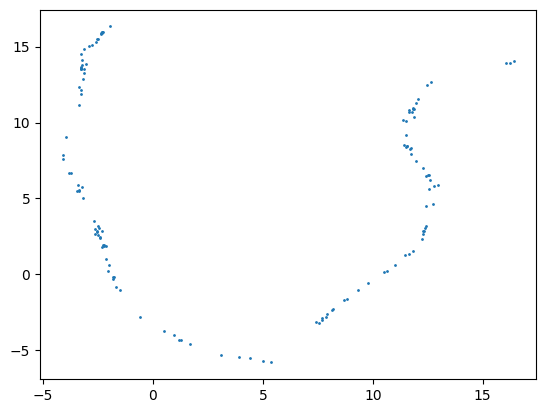

(133, 13)

In [8]:
from sklearn.preprocessing import StandardScaler
from umap.umap_ import UMAP

# Load UMAP model
umap = joblib.load('umap_model.pkl')

# Apply UMAP to MRI features
X_umap_mri = gene_impute_df.iloc[:,11:]
print(X_umap_mri.shape)
X_umap_mri = umap.transform(X_umap_mri)
print(X_umap_mri.shape)

# plot the umap
plt.scatter(X_umap_mri[:,0], X_umap_mri[:,1], s=1)
plt.show()


standard_scaler = StandardScaler()
Xs_non_mri = X.iloc[:,0:11]
Xs_non_mri = standard_scaler.fit_transform(Xs_non_mri)
Xs = np.c_[Xs_non_mri, X_umap_mri]
Xs.shape

### Load Model and Predict

In [9]:
with open('rfs_regression_model.pkl', 'rb') as f:
  rfs_model = pickle.load(f)

  # predict RFS
  rfs_pred = rfs_model.predict(Xs)
  print(rfs_pred)
  
  test_df['RelapseFreeSurvival (outcome)'] = rfs_pred



[52.00897486 57.70064479 58.76079528 55.01590077 63.19287887 52.128749
 56.64639932 44.10275914 55.14092342 56.93431063 64.88165745 56.41929167
 66.30963157 58.80372484 55.91671086 64.83336105 44.38575095 58.38444036
 52.18324634 43.58746687 49.14767851 38.1338748  50.19325893 64.88680556
 66.10934471 55.05396479 57.34289058 61.35623578 47.08493254 54.46415583
 53.20772271 73.10523024 67.27436517 55.50058472 55.46203571 68.65408901
 63.72985821 46.77866002 54.91366667 60.80191754 45.42186504 57.8644876
 50.25928225 53.97606963 49.00703836 53.58495945 66.09351138 38.128865
 54.63882076 55.25427174 60.82665433 53.29240889 56.53726001 61.19208333
 55.98505098 59.5655106  56.76791378 63.20942495 47.64443805 37.38471825
 44.04591459 44.9391634  74.67750709 56.4280754  60.37883628 61.86389074
 73.11511574 57.51485179 54.6976087  57.77221239 55.13563632 77.47340345
 59.45660281 58.94338793 52.05507898 58.63487825 53.26834887 53.08536609
 54.35287535 59.06757379 47.03564378 56.01109436 61.1940

In [10]:
### Save to results to csv
rfs_coutcome = test_df['RelapseFreeSurvival (outcome)']

reg_outcome = pd.DataFrame({'ID': IDs,'RelapseFreeSurvival (outcome)': rfs_coutcome,})

reg_outcome.to_csv('results/regression_outcome.csv', index=False)